In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 1/2 * x ** 3 - 6 * x ** 2 - 18 * x + 1

In [16]:
def dichotomy_method(a, b, epsilon):
    iterations = []
    lengths = []
    
    while b - a > 2 * epsilon:
        y = (a + b - epsilon) / 2
        z = (a + b + epsilon) / 2
        
        if f(y) <= f(z):
            b = z
        else:
            a = y
    
        iterations.append((a + b) / 2)
        lengths.append(b - a)
    
    x_star = (a + b) / 2
    return x_star, iterations, lengths        

In [35]:
def golden_section_method(l, r, epsilon):
    iterations = []
    lengths = []
    
    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi
    
    x_1 = l + resphi * (r - l)
    x_2 = r - resphi * (r - l)
    f_1 = f(x_1)
    f_2 = f(x_2)
    
    while np.abs(r - l) > epsilon:
        if f_1 < f_2:
            r = x_2
            x_2 = x_1
            f_2 = f_1
            x_1 = l + resphi * (r - l)
            f_1 = f(x_1)
        else:
            l = x_1
            x_1 = x_2
            f_1 = f_2
            x_2 = r - resphi * (r - l)
            f_2 = f(x_2)
        
        iterations.append((l + r) / 2)
        lengths.append(np.abs(r - l))
    
    return (r + l) / 2, iterations, lengths

In [43]:
a, b = 0, 15
epsilon = 1e-7

x_dichotomy, iterations_dichotomy, lengths_dichotomy = dichotomy_method(a, b, epsilon)
x_golden_section, iterations_golden_section, lengths_golden_section = golden_section_method(a, b, epsilon)

In [44]:
x = np.linspace(a, b, 10000)
y = f(x)

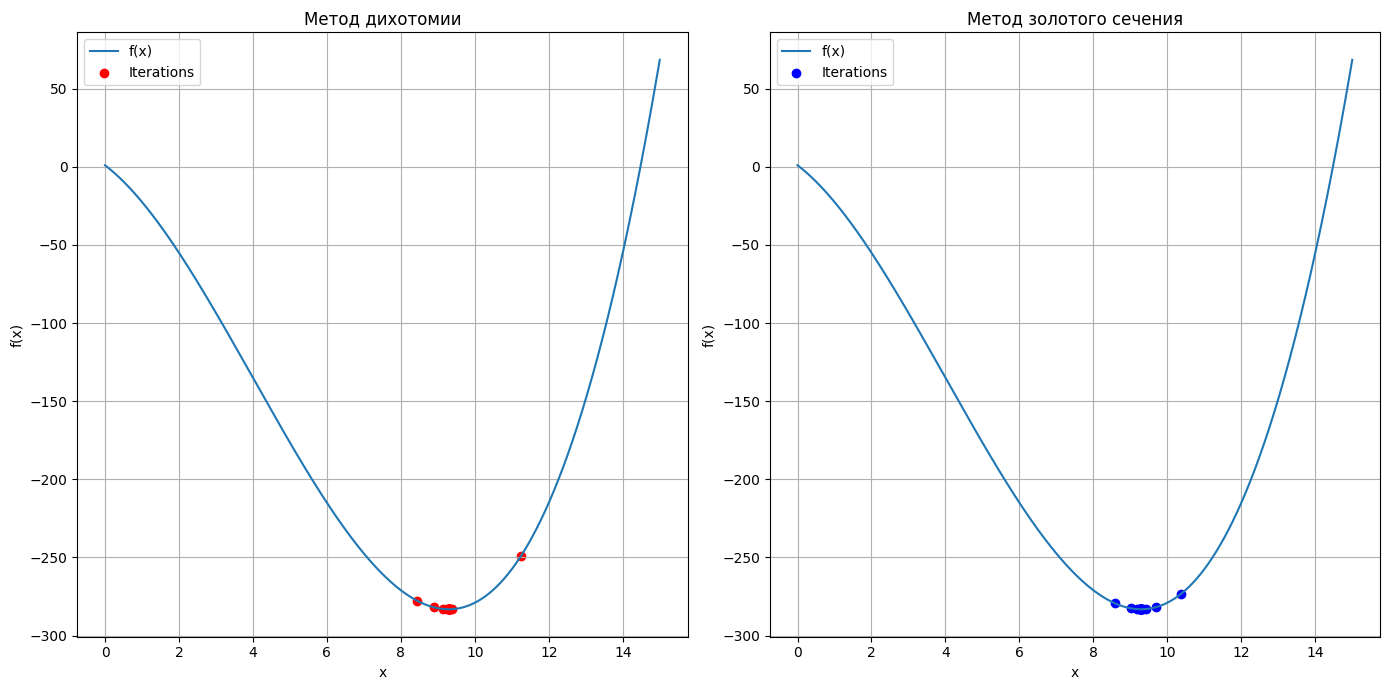

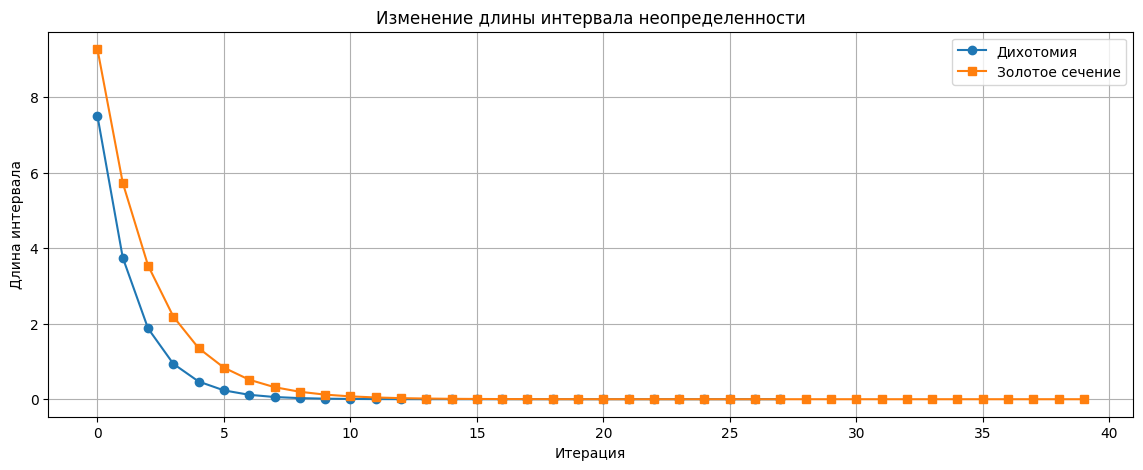

In [45]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(x, y, label="f(x)")
plt.scatter(iterations_dichotomy, [f(i) for i in iterations_dichotomy], color="red", label="Iterations")
plt.title("Метод дихотомии")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, y, label="f(x)")
plt.scatter(iterations_golden_section, [f(i) for i in iterations_golden_section], color="blue", label="Iterations")
plt.title("Метод золотого сечения")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# График изменения длины интервала неопределенности
plt.figure(figsize=(14, 5))
plt.plot(range(len(lengths_dichotomy)), lengths_dichotomy, label="Дихотомия", marker="o")
plt.plot(range(len(lengths_golden_section)), lengths_golden_section, label="Золотое сечение", marker="s")
plt.title("Изменение длины интервала неопределенности")
plt.xlabel("Итерация")
plt.ylabel("Длина интервала")
plt.legend()
plt.grid()
plt.show()

In [47]:
print("Метод дихотомии:")
print(f"Минимум функции: x* ≈ {x_dichotomy:.5f}, f(x*) ≈ {f(x_dichotomy):.5f}")
print(f"Количество итераций: {len(iterations_dichotomy)}")

print("\nМетод золотого сечения:")
print(f"Минимум функции: x* ≈ {x_golden_section:.5f}, f(x*) ≈ {f(x_golden_section):.5f}")
print(f"Количество итераций: {len(iterations_golden_section)}")

Метод дихотомии:
Минимум функции: x* ≈ 9.29150, f(x*) ≈ -283.16207
Количество итераций: 28

Метод золотого сечения:
Минимум функции: x* ≈ 9.29150, f(x*) ≈ -283.16207
Количество итераций: 40
